##### Importing libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error ,mean_squared_error

##### Loading Data

In [114]:
df =pd.read_excel('./electric_vehicles_spec_2025.xlsx',"model_data")
df

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,acceleration_0_100_s,fast_charging_power_kw_dc,FWD,RWD,AWD,range_km
0,155,37.8,235,156,7.0,67,1,0,0,225
1,155,37.8,235,149,7.0,67,1,0,0,225
2,200,50.8,345,158,5.9,79,1,0,0,280
3,200,50.8,345,158,6.2,79,1,0,0,280
4,150,60.0,310,156,7.5,78,1,0,0,315
...,...,...,...,...,...,...,...,...,...,...
473,210,71.0,440,148,6.0,240,0,1,0,365
474,190,49.0,343,148,5.9,70,0,1,0,265
475,190,65.0,343,146,5.6,114,0,1,0,360
476,190,65.0,543,153,3.8,114,0,0,1,350


In [115]:
df.columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm',
       'efficiency_wh_per_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'FWD', 'RWD', 'AWD', 'range_km'],
      dtype='object')

##### Creating X and Y data matrices

In [116]:
x = df[['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm',
       'efficiency_wh_per_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'FWD', 'RWD', 'AWD']]

y = df['range_km']


In [117]:
x.shape , y.shape

((478, 9), (478,))

##### Splitting X and Y to 80/20 Train/test 

In [118]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [119]:
x_train.shape , y_train.shape

((382, 9), (382,))

In [120]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 236 to 138
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              96 non-null     int64  
 1   battery_capacity_kWh       96 non-null     float64
 2   torque_nm                  96 non-null     int64  
 3   efficiency_wh_per_km       96 non-null     int64  
 4   acceleration_0_100_s       96 non-null     float64
 5   fast_charging_power_kw_dc  96 non-null     int64  
 6   FWD                        96 non-null     int64  
 7   RWD                        96 non-null     int64  
 8   AWD                        96 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 7.5 KB


#####  Building & Training Model
Since the Features and the target variable are numerical values,the best model to use is a "Linear Regression"  

In [121]:
model  = LinearRegression()

Training the model 

In [122]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Testing the model 
Testing the model with the x_test sets

In [123]:
y_pred =model.predict(x_test)

##### Model performance
 Calculate MAE,MSA,R-squared score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{"-"*20} Model Performance {"-"*20} \n Mean Absolute Error : {mae} \n Mean Squared Error : {mse} \n R-squared : {r2} \n{"-"*59}")

-------------------- Model Performance -------------------- 
 Mean Absolute Error : 21.914721369664875 
 Mean Squared Error : 688.6988109792698 
 R-squared : 0.94036633281821 
 -----------------------------------------------------------


##### Plotting the results

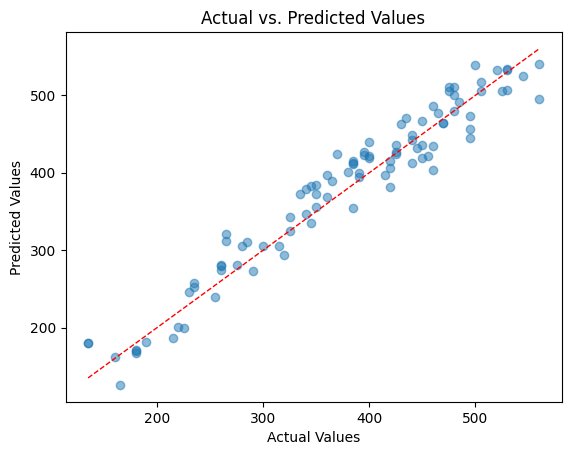

In [125]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=1 )
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()